In [154]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [155]:
file_path = 'https://storage.googleapis.com/bungkit-awairs/air_quality_data_fix.csv'
df = pd.read_csv(file_path)

df.head()

,latitude,longitude,dateTime,regionCode,universal_aqi,universal_aqi_category,dominant_pollutant,co,no2,o3,...,pm25,so2,health_general_population,health_elderly,health_lung_disease,health_heart_disease,health_athletes,health_pregnant_women,health_children,City
0,-7.294524,112.732623,2024-11-24T08:00:00Z,id,26,Low air quality,pm25,488.99,18.79,84.07,...,89.18,4.21,Reduce the intensity of your outdoor activitie...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,Avoid intense activities outdoors or postpone ...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,Surabaya
1,-7.296518,112.639345,2024-11-24T08:00:00Z,id,19,Poor air quality,pm25,489.34,8.71,89.47,...,113.85,5.66,Avoid intense activities outdoors or postpone ...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,Surabaya
2,-7.251514,112.759883,2024-11-24T08:00:00Z,id,38,Low air quality,o3,492.09,16.41,78.74,...,45.67,3.64,Reduce the intensity of your outdoor activitie...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,Avoid intense activities outdoors or postpone ...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,Surabaya
3,-7.283691,112.745216,2024-11-24T08:00:00Z,id,30,Low air quality,pm25,489.48,14.84,82.55,...,75.29,3.98,Reduce the intensity of your outdoor activitie...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,Avoid intense activities outdoors or postpone ...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,Surabaya
4,-7.262437,112.721854,2024-11-24T08:00:00Z,id,30,Low air quality,pm25,491.03,16.86,82.08,...,75.09,4.18,Reduce the intensity of your outdoor activitie...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,Avoid intense activities outdoors or postpone ...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,The current level of air quality is likely to ...,Surabaya


In [156]:
le = LabelEncoder()
le.fit(y)

if 'dominant_pollutant' in df.columns:
    df['dominant_pollutant']
else:
    raise ValueError("The 'dominant_pollutant' column is missing in the dataset.")

In [157]:
features = ['universal_aqi', 'co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'latitude', 'longitude']
if all(feature in df.columns for feature in features):
    X = df[features]
    y = df['dominant_pollutant']
else:
    raise ValueError("Some features are missing in the dataset.")

print(f"Shape of Features (X): {X.shape}")
print(f"Shape of Target (y): {y.shape}")

Shape of Features (X): (4503, 9)
Shape of Target (y): (4503,)


In [158]:
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# Print class distribution
print("Class distribution:")
print(pd.Series(le.inverse_transform(y_encoded)).value_counts())

print("\nClass distribution in training set:")
print(pd.Series(le.inverse_transform(y_train)).value_counts())

print("\nClass distribution in test set:")
print(pd.Series(le.inverse_transform(y_test)).value_counts())

# Print shapes of training and testing sets
print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

Class distribution:
pm25    3745
pm10     680
o3        78
Name: count, dtype: int64

Class distribution in training set:
pm25    2996
pm10     544
o3        62
Name: count, dtype: int64

Class distribution in test set:
pm25    749
pm10    136
o3       16
Name: count, dtype: int64

Shape of X_train: (3602, 9)
Shape of y_train: (3602,)


<ipython-input-159-aff79c041881>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.Series(le.inverse_transform(y_encoded)), order=pd.Series(le.inverse_transform(y_encoded)).value_counts().index, palette="viridis")


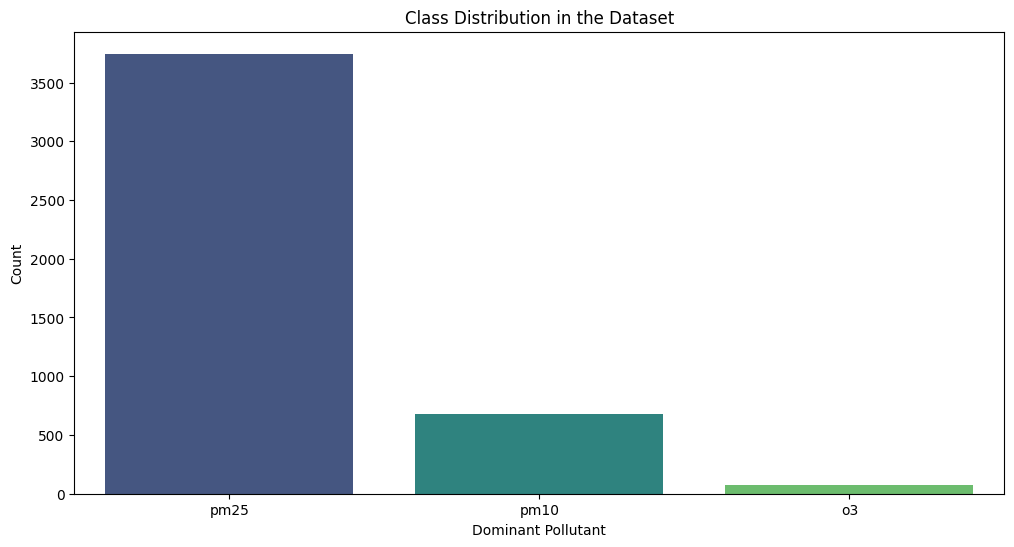

<ipython-input-159-aff79c041881>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.Series(le.inverse_transform(y_train)), order=pd.Series(le.inverse_transform(y_train)).value_counts().index, palette="coolwarm")


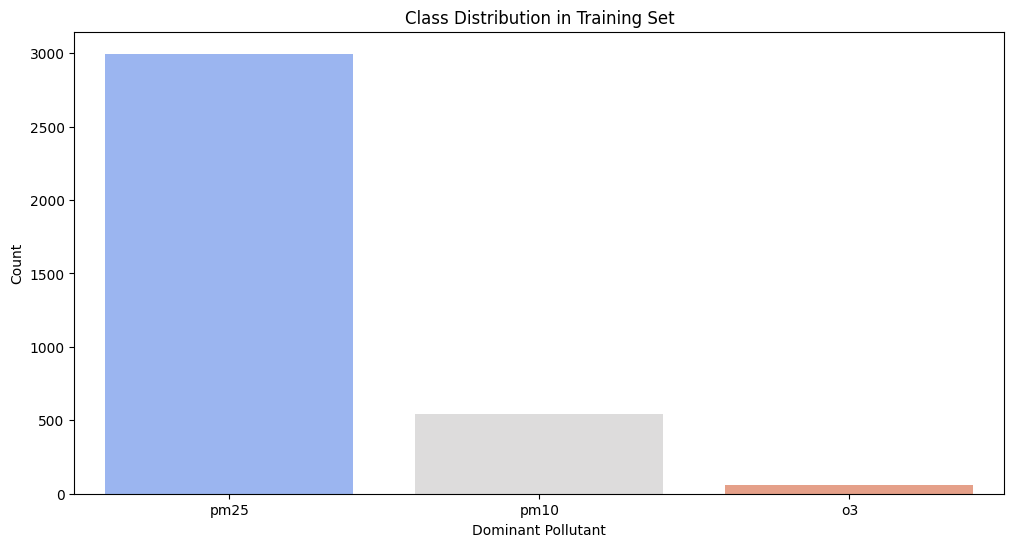

<ipython-input-159-aff79c041881>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.Series(le.inverse_transform(y_test)), order=pd.Series(le.inverse_transform(y_test)).value_counts().index, palette="coolwarm")


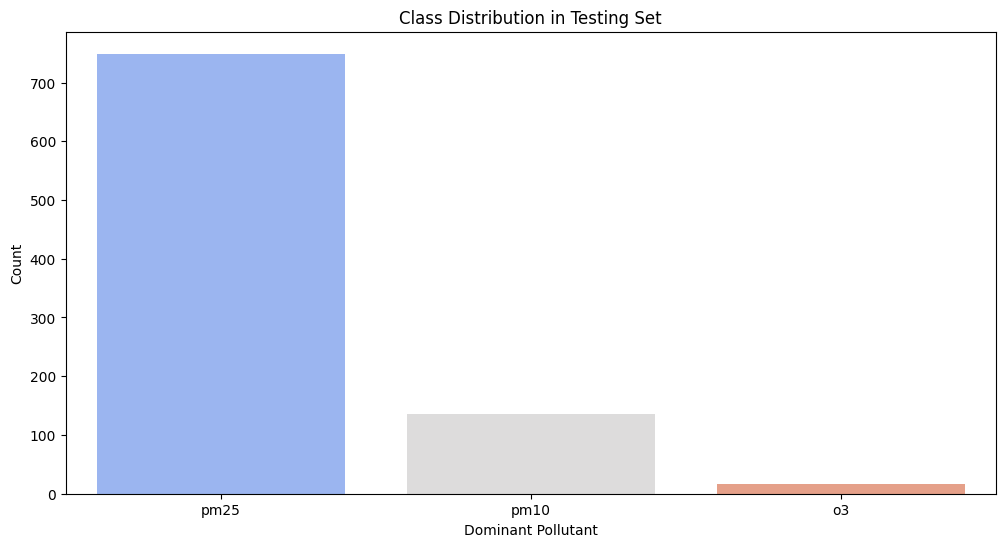

In [159]:
# Visualize class distribution
plt.figure(figsize=(12, 6))
sns.countplot(x=pd.Series(le.inverse_transform(y_encoded)), order=pd.Series(le.inverse_transform(y_encoded)).value_counts().index, palette="viridis")
plt.title("Class Distribution in the Dataset")
plt.xlabel("Dominant Pollutant")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x=pd.Series(le.inverse_transform(y_train)), order=pd.Series(le.inverse_transform(y_train)).value_counts().index, palette="coolwarm")
plt.title("Class Distribution in Training Set")
plt.xlabel("Dominant Pollutant")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x=pd.Series(le.inverse_transform(y_test)), order=pd.Series(le.inverse_transform(y_test)).value_counts().index, palette="coolwarm")
plt.title("Class Distribution in Testing Set")
plt.xlabel("Dominant Pollutant")
plt.ylabel("Count")
plt.show()

In [160]:
# Check if training set contains multiple classes
if len(set(y_train)) < 2:
    raise ValueError("Training set contains only one class. Please ensure the dataset has multiple classes.")

In [161]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [162]:
# Prediksi dengan model
y_pred = rf_model.predict(X_test)

# Dekode nilai numerik ke nama polutan
actual_labels = le.inverse_transform(y_test)
predicted_labels = le.inverse_transform(y_pred)

# Tampilkan laporan klasifikasi dengan nama
print("\nRandom Forest Classifier Evaluation (Labels as Names):")
print(classification_report(actual_labels, predicted_labels, target_names=le.classes_))




Random Forest Classifier Evaluation (Labels as Names):
              precision    recall  f1-score   support

          o3       1.00      1.00      1.00        16
        pm10       1.00      1.00      1.00       136
        pm25       1.00      1.00      1.00       749

    accuracy                           1.00       901
   macro avg       1.00      1.00      1.00       901
weighted avg       1.00      1.00      1.00       901



<Figure size 1000x800 with 0 Axes>

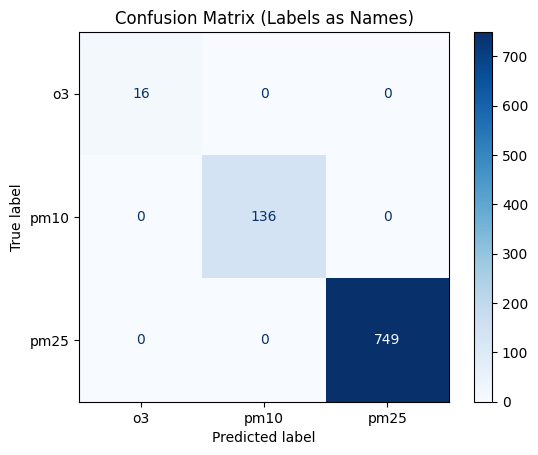

In [163]:
# Confusion Matrix
cm = confusion_matrix(actual_labels, predicted_labels, labels=le.classes_)

plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Labels as Names)")
plt.show()

<ipython-input-164-38b081e052af>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features_names, palette="viridis")


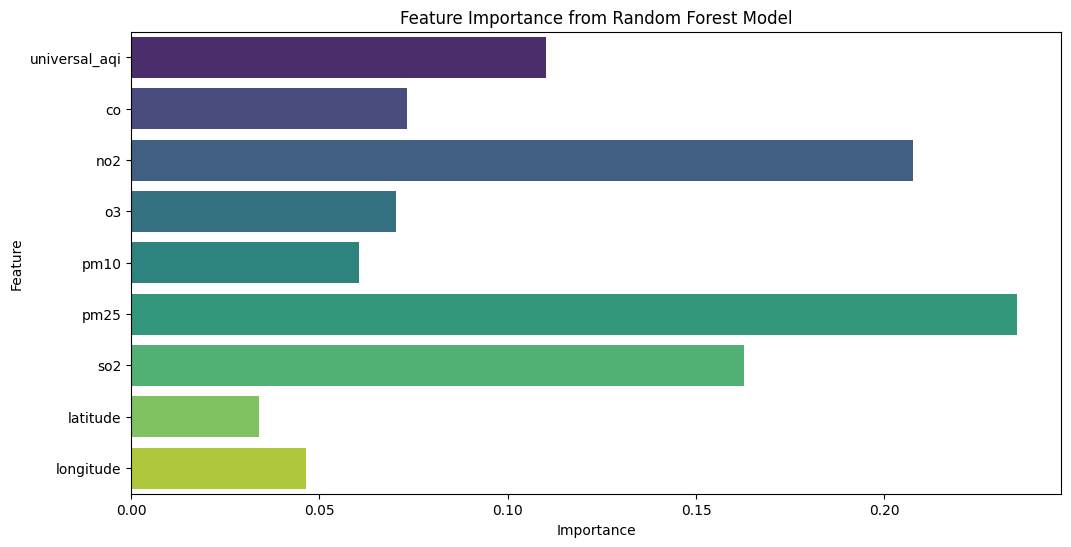

In [164]:
# Feature Importance
feature_importances = rf_model.feature_importances_
features_names = X.columns

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances, y=features_names, palette="viridis")
plt.title("Feature Importance from Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [165]:
# DataFrame Hasil
results = pd.DataFrame({
    'Actual': actual_labels,
    'Predicted': predicted_labels
})

# Tampilkan hasil pertama
print("\nComparison of Actual vs Predicted Labels:")
print(results.head(10))



Comparison of Actual vs Predicted Labels:
  Actual Predicted
0   pm10      pm10
1   pm25      pm25
2   pm25      pm25
3   pm25      pm25
4   pm25      pm25
5   pm25      pm25
6   pm25      pm25
7   pm10      pm10
8   pm25      pm25
9   pm25      pm25


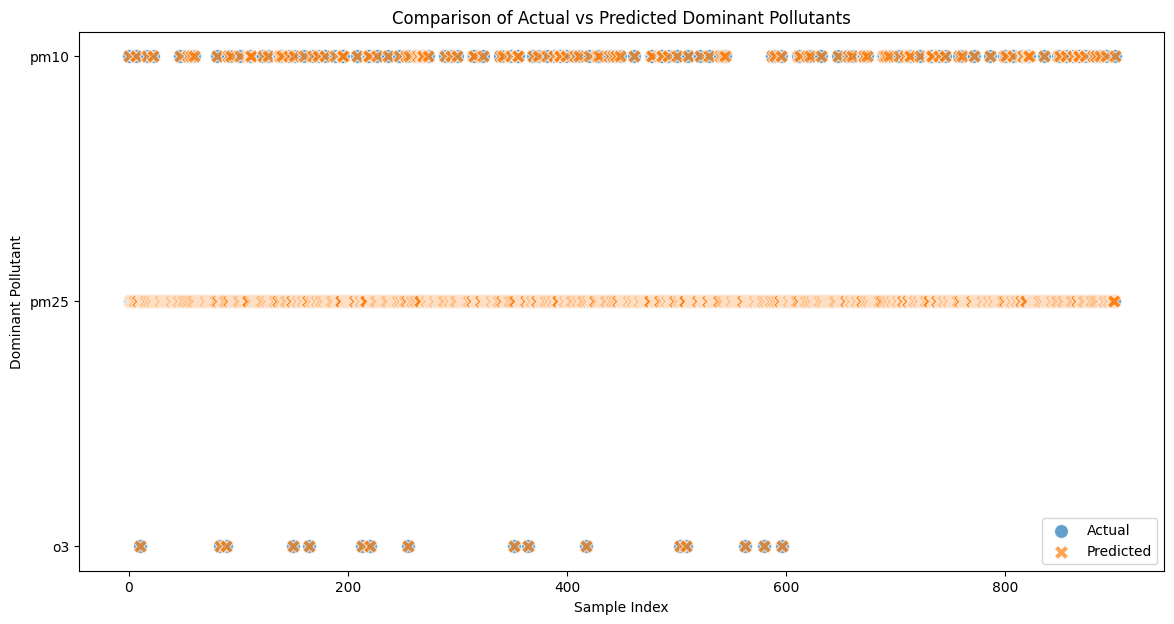

In [166]:
# Visualisasi hasil
plt.figure(figsize=(14, 7))
sns.scatterplot(x=range(len(results)), y=results['Actual'], label='Actual', alpha=0.7, s=100, marker='o')
sns.scatterplot(x=range(len(results)), y=results['Predicted'], label='Predicted', alpha=0.7, s=100, marker='X')
plt.title("Comparison of Actual vs Predicted Dominant Pollutants")
plt.xlabel("Sample Index")
plt.ylabel("Dominant Pollutant")
plt.legend()
plt.show()

In [167]:
joblib.dump(rf_model, 'RandForModel.pkl')
print("Model saved successfully in 'RandForModel.pkl'")

Model saved successfully in 'RandForModel.pkl'


In [168]:
joblib.dump(rf_model, 'FixModel-rf.joblib')
print("Model saved successfully in 'FixModel-rf.joblib'")


Model saved successfully in 'FixModel-rf.joblib'


In [169]:
# Misalnya, 'le' adalah LabelEncoder yang Anda gunakan
joblib.dump(le, 'label_encoder.joblib')
print("Model saved label successfully in 'label_encoder.joblib'")

Model saved label successfully in 'label_encoder.joblib'
